## Exploratory Data Analysis

After data is cleaned, it can now be used to answer the question of "Where students do aspire to progress to for post-secondary education?".

### Importing required modules

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

In [4]:
sns.set_theme()
industryTags = ['Arts&Media','Business&Finance','Engineering','Technology','Sciences','Medical','Others/Unsure']
colours = ['#703D57','#B58DB6','#E9C46A','#F4A261','#E76F51','#2A9D8F','#7D938A']
labelFont = {'size':13,'weight':'bold'}

### Reading cleaned data
Read the data from the excel file, storing the sheets into a ordered dictionary. Then, I am changing every industry not tagged to "Others/Unsure" for easier visualisation.

In [5]:
workbook = pd.read_excel('processedData.xlsx',sheet_name=None)
for sheet, data in workbook.items():
    data.loc[(data['Industry']!='Medical') & (data['Industry']!='Business&Finance') & (data['Industry']!='Arts&Media') & (data['Industry']!='Sciences') & (data['Industry']!='Technology') & (data['Industry']!='Engineering'),'Industry'] = 'Others/Unsure'

### What industries do students wish to enter?
We want to see the composition of the students interested in the different industries, we will use pie charts.
For instance, the first pie chart shows that a large portion of O Level students in 2021 want to enter STEM and Medical fields, these fields make up over half the student population.

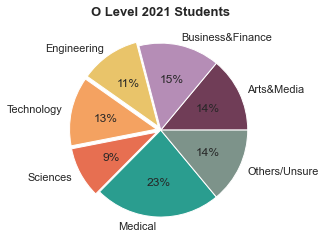

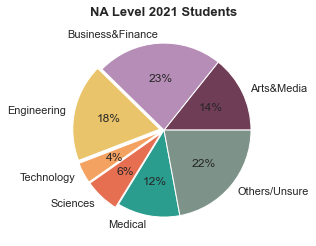

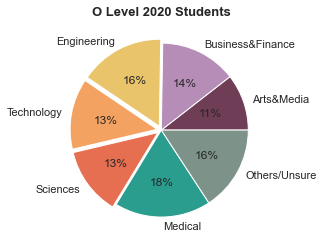

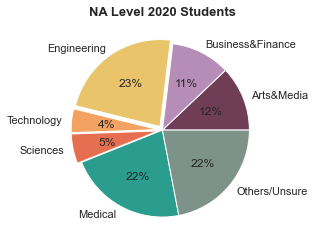

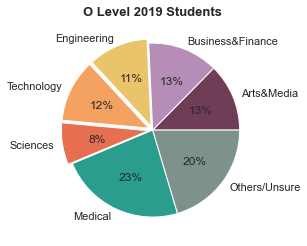

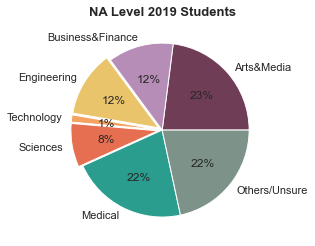

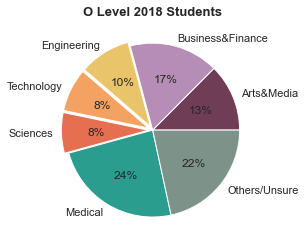

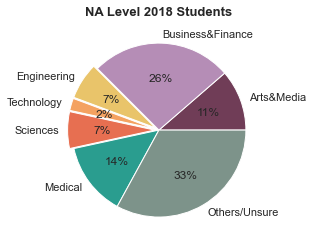

In [6]:
exp = [0] * len(industryTags)
exp[2:5] = [0.05] * 3
for i,(sheet, data) in enumerate(workbook.items()):
    plt.figure(i)
    count = Counter(data['Industry'])
    sizes = [count[tag] for tag in industryTags]
    plt.title(sheet+' Students',fontdict=labelFont)
    plt.pie(sizes,labels=industryTags,explode=exp,autopct='%.0f%%',colors=colours)

Seeing the composition change over time paints a clearer picture. A stacked bar chart is a good way to show this. Since only relative changes matter, the heights will be scaled by percentage.

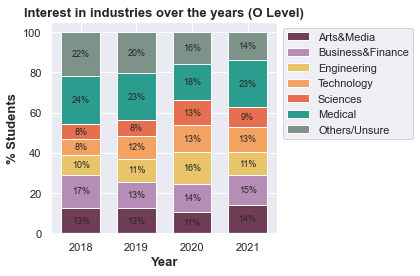

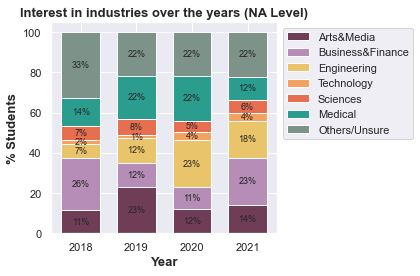

In [7]:
# Calculating the percentages
def calcPct(pctages,years,data):
    years.append(int(sheet[-4:]))
    count = Counter(data['Industry'])
    total = sum(count.values())
    for industry in industryTags:
        pct = count[industry] / total * 100
        pctages[industry].append(pct)
    return pctages, years

oPctages = {i:[] for i in industryTags}
oYears = []
naPctages = {i:[] for i in industryTags}
naYears = []
for sheet, data in workbook.items():
    if sheet.startswith('O'):
        calcPct(oPctages,oYears,data)
    else:
        calcPct(naPctages,naYears,data)

# Visualising percentages with a graph
def drawStackedBar(years,pctages,title,i):
    plt.figure(i)
    startHeight = [0]*len(years)
    for i,industry in enumerate(industryTags):
        bars = plt.bar(years,pctages[industry],label=industry,bottom=startHeight,color=colours[i],width=0.7,tick_label=years)
        startHeight = np.add(startHeight,pctages[industry])
        for i,rect in enumerate(bars):
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2.,startHeight[i]-(height/2), f'{height:.0f}%', ha="center", va="center", fontsize=9)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
    plt.ylabel('% Students',fontdict=labelFont)
    plt.xlabel('Year',fontdict=labelFont)
    plt.title(title,fontdict=labelFont)
    plt.tight_layout()
drawStackedBar(oYears,oPctages,'Interest in industries over the years (O Level)',9)
drawStackedBar(naYears,naPctages,'Interest in industries over the years (NA Level)',10)

Which industry has changed the most/least? A box plot shows this.

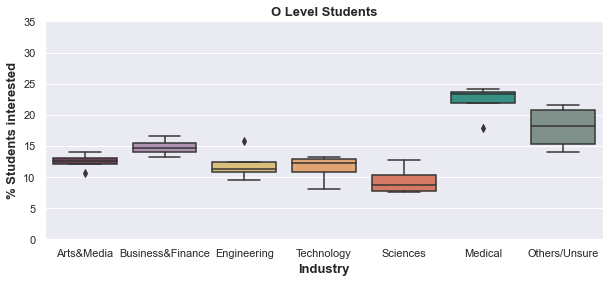

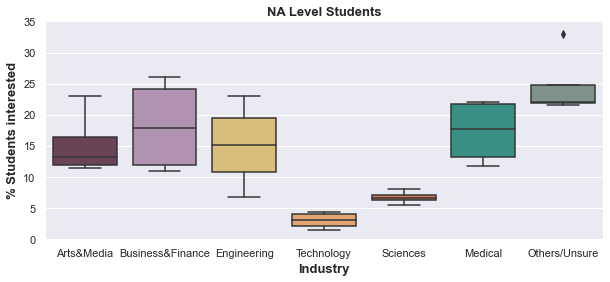

In [8]:
def drawBoxPlot(pctages,i,title):
    plt.figure(i,figsize=(10,4))
    df = {'Industry':[],'% Student':[]}
    for industry, iPctages in pctages.items():
        for pct in iPctages:
            df['Industry'].append(industry)
            df['% Student'].append(pct)
    df = pd.DataFrame(df)
    sns.boxplot(x='Industry',y='% Student',data=df,palette=colours)
    plt.ylabel('% Students interested',fontdict=labelFont)
    plt.xlabel('Industry',fontdict=labelFont)
    plt.title(title,fontdict=labelFont)
    plt.ylim(0,35)

drawBoxPlot(oPctages,1,'O Level Students')
drawBoxPlot(naPctages,2,'NA Level Students')

We can make a few observations from the above data:
- The medical industry is a consistently popular among O Level students.
- The "Others/Unsure" is shrinking over the years in O Level students.
  - Might be caused by the greater support for popular industries.
  - Is there a way to include more industries into students' career guidance?
- Interest in the engineering industry had a drastic increase in 2020 among NA Level students.
  - Did anything happened that year to spark interest?
- In most industries, O Level students are more consistent than NA Level student in terms of interest over the years.

### What pathway do students want to take?
We will use pie charts again to see the composition.

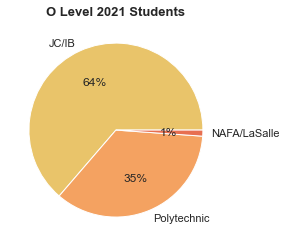

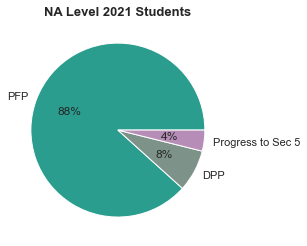

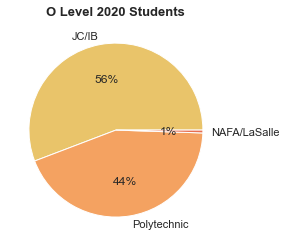

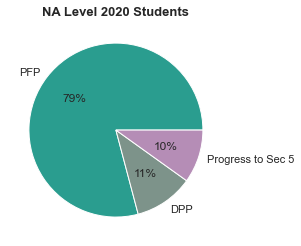

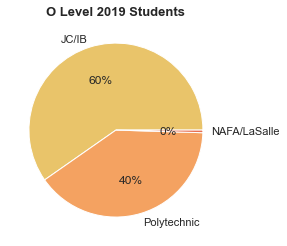

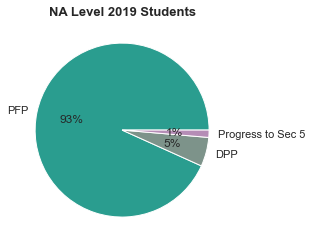

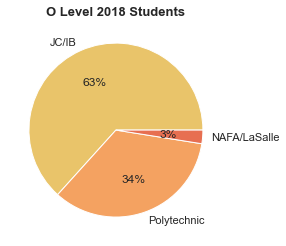

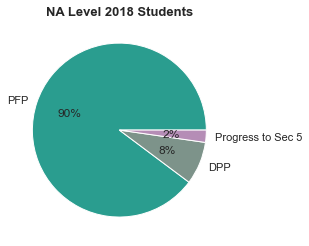

In [9]:
for i,(sheet, data) in enumerate(workbook.items()):
    if sheet[0] == 'O':
        paltte = colours[2:5]
    else:
        paltte = colours[-2:] + [colours[1]]
    plt.figure(i)
    count = Counter(data['Pathway'])
    sizes, labels = [], []
    for label, size in count.most_common():
        sizes.append(size)
        labels.append(label)
    plt.title(sheet+' Students',fontdict=labelFont)
    plt.pie(sizes,labels=labels,autopct='%.0f%%',colors=paltte)

How does this change over time? Making use of stacked bar charts again.

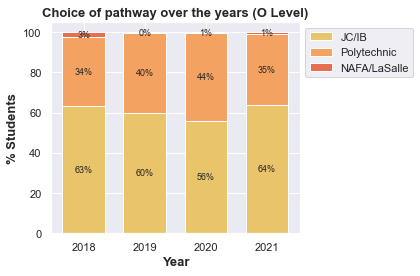

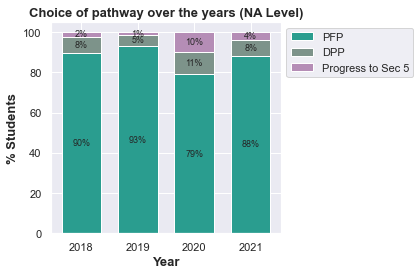

In [10]:
# Calculating the percentages
def calcPath(pctages,years,data):
    years.append(int(sheet[-4:]))
    count = Counter(data['Pathway'])
    total = sum(count.values())
    for path, population in count.most_common():
        pct = population / total * 100
        pctages[path].append(pct)
    return pctages, years

oPaths = ['JC/IB','Polytechnic','NAFA/LaSalle']
naPaths = ['PFP','DPP','Progress to Sec 5']
oPctages = {i:[] for i in oPaths}
oYears = []
naPctages = {i:[] for i in naPaths}
naYears = []
for sheet, data in workbook.items():
    if sheet.startswith('O'):
        calcPath(oPctages,oYears,data)
    else:
        calcPath(naPctages,naYears,data)

# Visualising percentages with a graph
def drawStackedBar(years,pctages,title,i,items,paltte):
    plt.figure(i)
    startHeight = [0]*len(years)
    for i,path in enumerate(items):
        bars = plt.bar(years,pctages[path],label=path,bottom=startHeight,color=paltte[i],width=0.7,tick_label=years)
        startHeight = np.add(startHeight,pctages[path])
        for i,rect in enumerate(bars):
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2.,startHeight[i]-(height/2), f'{height:.0f}%', ha="center", va="center", fontsize=9)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
    plt.ylabel('% Students',fontdict=labelFont)
    plt.xlabel('Year',fontdict=labelFont)
    plt.title(title,fontdict=labelFont)
    plt.tight_layout()
drawStackedBar(oYears,oPctages,'Choice of pathway over the years (O Level)',9,oPaths,colours[2:5])
drawStackedBar(naYears,naPctages,'Choice of pathway over the years (NA Level)',10,naPaths,colours[-2:] + [colours[1]])

We can conclude using the above data that:
- Among O Level students, JC is more popular than polytechnic.
- The vast majority of NA Level students wants to enter PFP